# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
pip install citipy

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | ta`u
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | el granada
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | hadibu
Processing Record 13 of Set 1 | glendive
Processing Record 14 of Set 1 | axim
Processing Record 15 of Set 1 | jakar
Processing Record 16 of Set 1 | waurn ponds
Processing Record 17 of Set 1 | nadym
Processing Record 18 of Set 1 | vyazemskiy
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | kuanda
Processing Record 22 of Set 1 | edinburgh of the seven seas
Processing Recor

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,290.07,93,74,1.40,IN,1700263068
1,grytviken,-54.2811,-36.5092,272.45,74,18,0.72,GS,1700263068
2,ta`u,-14.2336,-169.5144,301.11,83,100,7.98,AS,1700263069
3,hawaiian paradise park,19.5933,-154.9731,299.88,71,20,4.63,US,1700263069
4,port-aux-francais,-49.3500,70.2167,278.74,97,100,13.06,TF,1700263069


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,290.07,93,74,1.40,IN,1700263068
1,grytviken,-54.2811,-36.5092,272.45,74,18,0.72,GS,1700263068
2,ta`u,-14.2336,-169.5144,301.11,83,100,7.98,AS,1700263069
3,hawaiian paradise park,19.5933,-154.9731,299.88,71,20,4.63,US,1700263069
4,port-aux-francais,-49.3500,70.2167,278.74,97,100,13.06,TF,1700263069


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

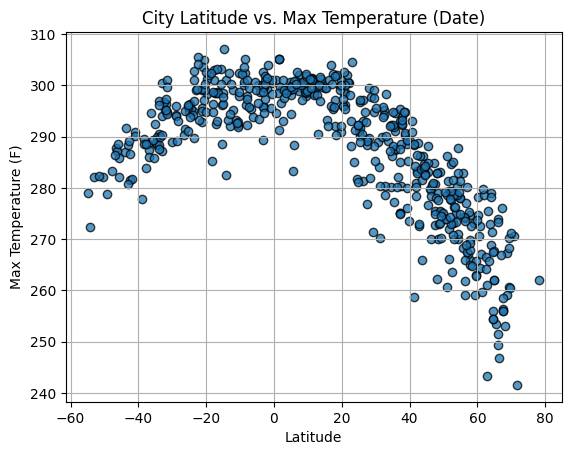

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

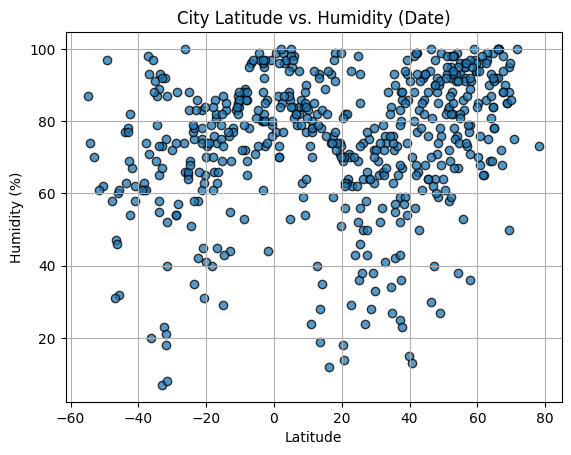

In [19]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

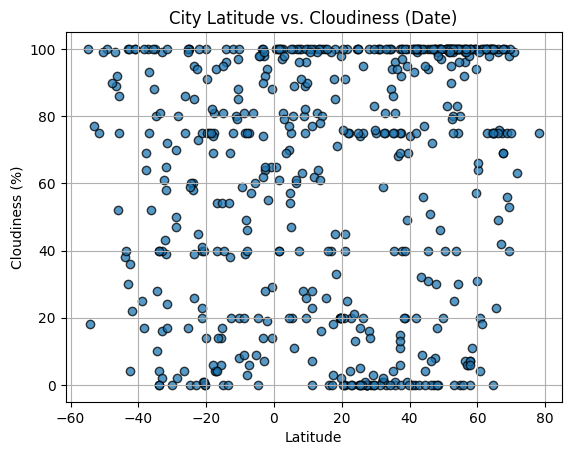

In [22]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

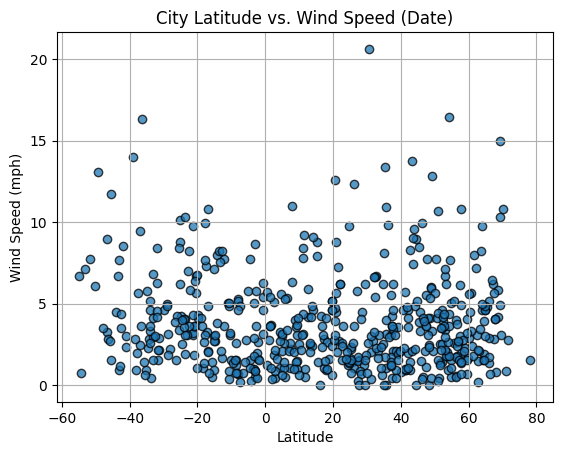

In [23]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere, file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if hemisphere == "northern":
        plt.annotate("Note: Linear regression for Northern Hemisphere", (min(x_values), max(y_values)-10), fontsize=10, color="red")
    elif hemisphere == "southern":
        plt.annotate("Note: Linear regression for Southern Hemisphere", (min(x_values), max(y_values)-10), fontsize=10, color="red")

    print(f"The r-squared is: {rvalue**2}")

    # Save the figure
    plt.savefig(file_name)

    # Show plot
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,290.07,93,74,1.40,IN,1700263068
3,hawaiian paradise park,19.5933,-154.9731,299.88,71,20,4.63,US,1700263069
5,el granada,37.5027,-122.4694,292.75,88,75,3.60,US,1700263069
6,iqaluit,63.7506,-68.5145,273.00,69,100,8.23,CA,1700263070
9,aykhal,66.0000,111.5000,251.48,100,99,1.33,RU,1700263070


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,272.45,74,18,0.72,GS,1700263068
2,ta`u,-14.2336,-169.5144,301.11,83,100,7.98,AS,1700263069
4,port-aux-francais,-49.3500,70.2167,278.74,97,100,13.06,TF,1700263069
7,west island,-12.1568,96.8225,299.14,78,100,3.60,CC,1700263070
8,adamstown,-25.0660,-130.1015,296.24,83,100,10.13,PN,1700263070


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7543767465567797


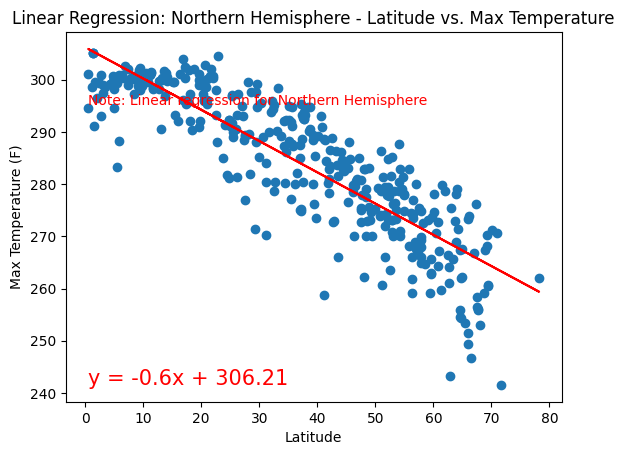

In [28]:
# Linear regression on Northern Hemisphere for latitude vs. temperature
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Linear Regression: Northern Hemisphere - Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (F)", "northern", "../output_data/Northern_Lat_vs_MaxTemp.png")

The r-squared is: 0.48777893293369995


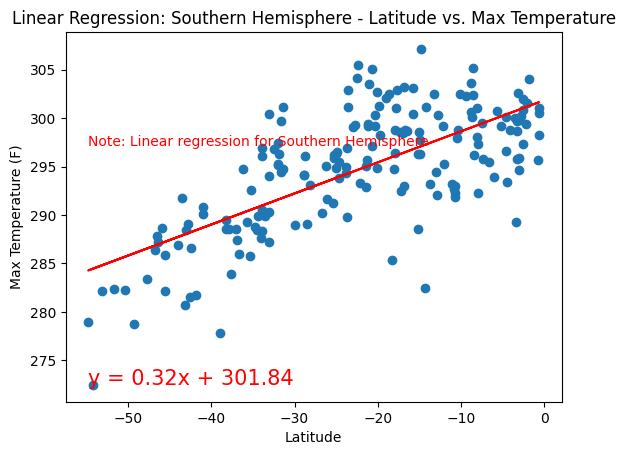

In [30]:
# Linear regression on Southern Hemisphere for latitude vs. temperature
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Linear Regression: Southern Hemisphere - Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (F)", "southern", "../output_data/Southern_Lat_vs_MaxTemp.png")


**Discussion about the linear relationship:** 
Northern Hemisphere: There is a weak positive correlation between latitude and humidity. The relationship is not as pronounced, indicating that latitude alone may not be a strong predictor of humidity in the Northern Hemisphere.

Southern Hemisphere: Similar to the Northern Hemisphere, there is a weak positive correlation between latitude and humidity in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03253176904725047


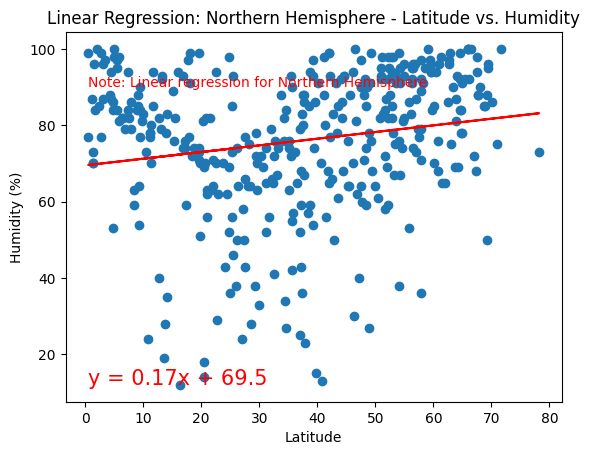

In [31]:
# Linear regression on Northern Hemisphere for latitude vs. humidity
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Linear Regression: Northern Hemisphere - Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", "northern", "../output_data/Northern_Lat_vs_Humidity.png")



The r-squared is: 0.0987442716753398


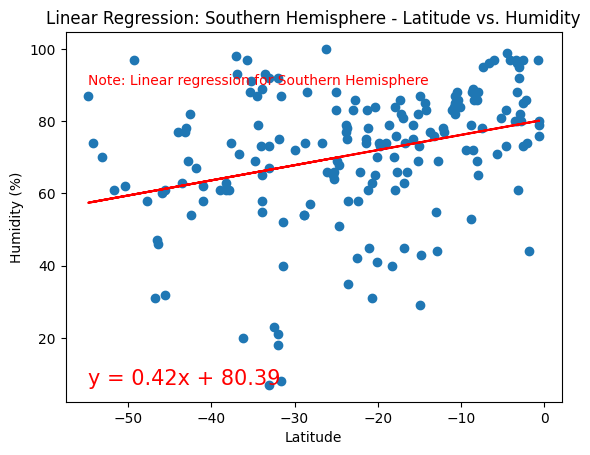

In [32]:
# Linear regression on Southern Hemisphere for latitude vs. humidity
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Linear Regression: Southern Hemisphere - Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", "southern", "../output_data/Southern_Lat_vs_Humidity.png")


**Discussion about the linear relationship:** 
Northern Hemisphere: There is a weak positive correlation between latitude and humidity. The relationship is not as pronounced, indicating that latitude alone may not be a strong predictor of humidity in the Northern Hemisphere.

Southern Hemisphere: Similar to the Northern Hemisphere, there is a weak positive correlation between latitude and humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.019714843673020004


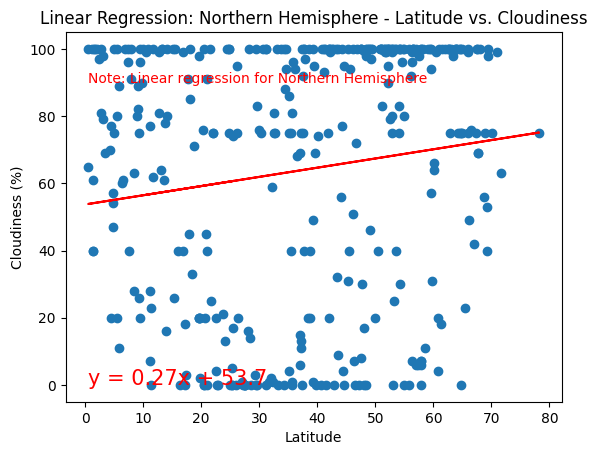

In [33]:
# Linear regression on Northern Hemisphere for latitude vs. cloudiness
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Linear Regression: Northern Hemisphere - Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", "northern", "../output_data/Northern_Lat_vs_Cloudiness.png")


The r-squared is: 0.008037626391912972


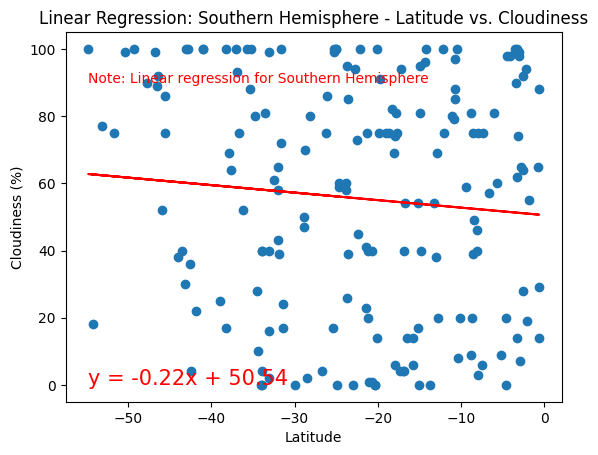

In [34]:
# Linear regression on Southern Hemisphere for latitude vs. cloudiness
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Linear Regression: Southern Hemisphere - Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", "southern", "../output_data/Southern_Lat_vs_Cloudiness.png")


**Discussion about the linear relationship:** 
Northern Hemisphere: There is a weak positive correlation between latitude and cloudiness. However, the relationship is not strong, suggesting that latitude alone may not be a robust predictor of cloudiness in the Northern Hemisphere.

Southern Hemisphere: Similar to the Northern Hemisphere, there is a weak positive correlation between latitude and cloudiness in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.007624777151057527


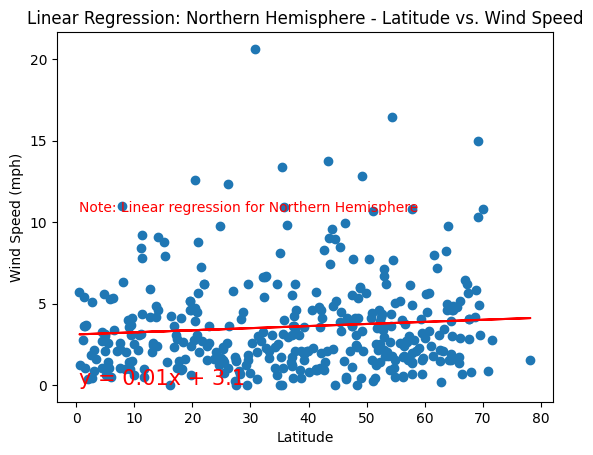

In [35]:
# Linear regression on Northern Hemisphere for latitude vs. wind speed
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Linear Regression: Northern Hemisphere - Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (mph)", "northern", "../output_data/Northern_Lat_vs_WindSpeed.png")

The r-squared is: 0.05620789265912255


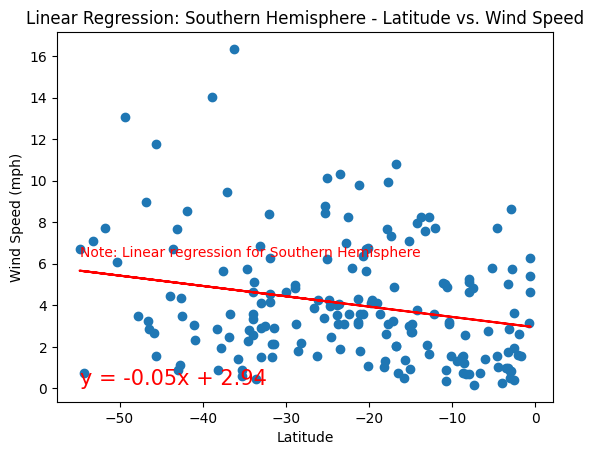

In [36]:
# Linear regression on Southern Hemisphere for latitude vs. wind speed
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Linear Regression: Southern Hemisphere - Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (mph)", "southern", "../output_data/Southern_Lat_vs_WindSpeed.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: There is a weak positive correlation between latitude and wind speed. As you move away from the equator (higher latitude), the wind speed tends to slightly increase.

Southern Hemisphere: Similar to the Northern Hemisphere, there is a weak positive correlation between latitude and wind speed in the Southern Hemisphere.